In [1]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                                       data_home='datasets')
lfw_people.data.shape

(1288, 1850)

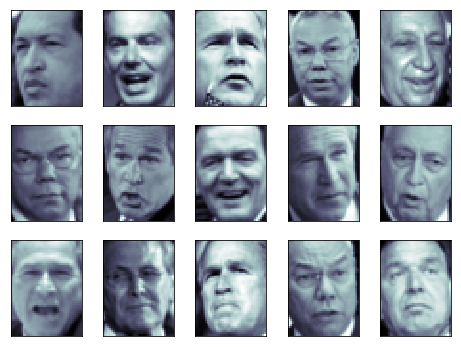

In [3]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap=plt.cm.bone)

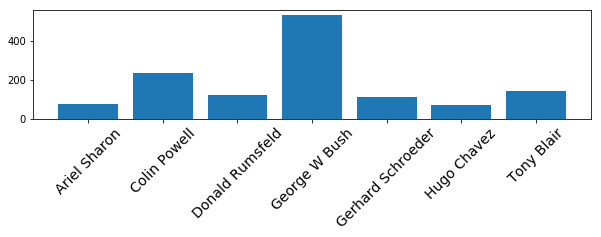

In [4]:
plt.figure(figsize=(10, 2))

unique_targets = np.unique(lfw_people.target)
counts = [(lfw_people.target == i).sum() for i in unique_targets]

plt.xticks(unique_targets, lfw_people.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=14)
_ = plt.bar(unique_targets, counts)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print(X_train.shape, X_test.shape)

(966, 1850) (322, 1850)


In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

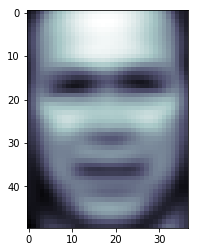

In [11]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap=plt.cm.bone)

In [12]:
pca.components_.shape

(150, 1850)

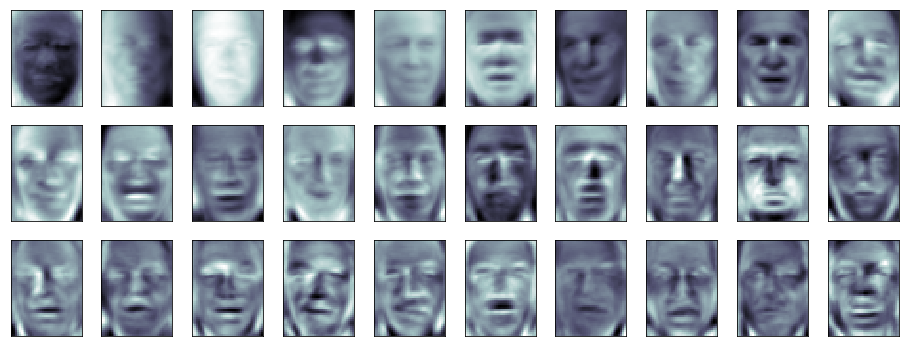

In [24]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap=plt.cm.bone)
    

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
 X_train_pca.shape
X_test_pca.shape

(322, 150)

In [16]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.24012318 -0.00850332  0.03028248 -0.70564264 -1.1280973   0.39778537
 -1.1853919  -0.57514995 -1.34374893 -0.53054321 -0.80182421 -0.82579261
  1.51215947  0.96919197  1.19688201  0.98144603 -0.64660555 -0.68093151
  0.21438628  1.00038338 -1.4893055  -2.97330046 -1.83563852 -0.82516176
 -0.36338428  1.37141252 -0.08474647  0.03776914  0.58644241  0.1474784
  0.43684444  1.04067659 -1.38662267 -1.27406847  0.55258298 -1.49176478
 -2.08826137 -1.19857466  0.27920893 -0.79306513  1.40619016 -0.06316862
 -1.98173809 -0.37615982  0.1767721   0.92795545  2.52432275 -0.55662483
 -0.18129446  1.42003596  0.17059463 -0.14702195 -0.71773136  0.24384157
  1.87210822  1.93557453  0.35193971 -1.11444545  2.77890801 -0.43744421
  1.69606936 -0.79308009 -3.36770082  0.97932523  0.82360351 -1.27360988
 -1.53099704 -0.74158579  0.19876331 -1.71308053 -0.78260744 -0.44658929
  1.6394043  -0.76482224 -0.63368273 -0.36601117  0.27761462 -0.07777993
  2.53238058 -0.91466039 -0.70908755 -0.7544387   1.21261561  0.95711541
 -1.11630726 -0.91811603 -0.93903553  2.65345025 -0.23021802  1.62927651
  1.05153465  1.25924683  0.38977814 -1.93759859 -1.1995281  -0.73777908
  3.4711616  -0.79403913  0.66545647 -0.69254714 -0.60214627 -0.35670194
 -0.93910903 -2.54416728 -0.19313875 -0.34805983 -0.70387667 -1.57306075
  1.5986836  -1.24624741  2.23762393  1.55331445 -3.54572558  1.27172732
  1.6376183  -1.79566681 -1.59947062  1.08623123 -1.36610365  1.57793975
 -1.08773708  0.17370072  2.05662918  1.13488662  0.85617542  0.99768245
  0.25317442 -1.93505549  1.49146581 -0.60201043  0.40995827  0.18195352
 -1.34082949  1.12319231 -0.15033016 -1.48143744 -1.35313106 -1.18273771
 -2.01580143  0.60816044 -0.388989    0.42656332  1.63683856  0.34240249
  0.15042076 -2.11038065  1.49501097 -0.46941024 -1.19062388 -0.64626491].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

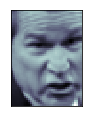

In [17]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape((50, 37)), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i])[0]
    color = 'black' if y_pred == y_test[i] else 'red'
    ax.set_title(lfw_people.target_names[y_pred], fontsize='small', color=color)

In [18]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.71      0.80        28
     Colin Powell       0.81      0.87      0.84        63
  Donald Rumsfeld       0.83      0.79      0.81        24
    George W Bush       0.85      0.91      0.88       132
Gerhard Schroeder       0.80      0.80      0.80        20
      Hugo Chavez       0.93      0.59      0.72        22
       Tony Blair       0.82      0.85      0.84        33

        micro avg       0.84      0.84      0.84       322
        macro avg       0.85      0.79      0.81       322
     weighted avg       0.85      0.84      0.84       322



In [19]:
(metrics.confusion_matrix(y_test, y_pred))

array([[ 20,   4,   0,   3,   1,   0,   0],
       [  1,  55,   0,   4,   0,   1,   2],
       [  0,   2,  19,   3,   0,   0,   0],
       [  1,   6,   3, 120,   0,   0,   2],
       [  0,   0,   1,   1,  16,   0,   2],
       [  0,   1,   0,   6,   2,  13,   0],
       [  0,   0,   0,   4,   1,   0,  28]], dtype=int64)